# ***We will make our own Linear Regression Library here***

## Linear Regression

We will at first create a function that will import all the necessary libraries we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
%matplotlib inline
    
    

We will now make our own Linear Regression model with customized required modules :)

In [2]:
class linearRegression:
    def __init__(self, data = [], labels= []):
        self.data = data
        self.labels = labels
    
    def computeCost(self, data, labels, theta): #We need this function to compute the cost of our predicted data comparing with the real label data.
        data = np.array(data)
        labels = np.array(labels)
        theta = np.array(theta)
        
        training_samples = len(labels)
        cost = 0
        predicted_value = np.dot(data, theta)
        cost = (1/(2*training_samples)) * (np.sum(np.square(predicted_value - labels)))
        return cost
    
    def gradientDescent(self, data, labels, theta, learning_rate = 0.01, num_iters = 300): #This function will help us to find out the perfect value of theta for which the cost will be minimum.
        data = np.array(data)
        labels = np.array(labels)
        #theta = np.array(theta).reshape(1,1)
        
        training_samples = len(labels)
        cost_history = [float("inf")]
        theta_history = []
        
        for iter in range(num_iters):
            error = np.dot(data, theta) - labels
            theta = theta - ( (learning_rate/training_samples) * (np.dot(data.T, error)))
            theta_history.append(theta)
            cost = self.computeCost(data, labels, theta)
            if cost_history[-1] <= cost:
                print("The required number of iterations: {}".format(iter))
                break
            else:
                cost_history.append(cost)
            
        return theta, theta_history, cost_history
    
    def featureScaling(self, data): #if our data values are too scattered then we will use this function to scale them. We wll convert those values to zero mean and one standard deviation values.
        data = np.array(data)
        
        zero_mean_array = np.array([(float(data[i,0]) - float(np.mean(data, axis = 0, dtype=np.float64))) for i in range(np.size(data,0))]).reshape(np.size(data,0), 1)
        X_scaled = np.array([(float(zero_mean_array[i,0]) / float(np.std(data, axis=0, dtype = np.float64))) for i in range(np.size(data,0))]).reshape(np.size(data,0), 1)
        return X_scaled
    
    def Normalization(self, data, labels): #This is an alternative function of gradient descent. When the number of training examples are few, we can use this to find out the value of theta. Advantage of this function is that, we do not need to iterate over the whole batch! That saves a lot of time.
        data = np.array(data)
        labels = np.array(labels)
        
        theta = np.zeros(1).reshape(1,1)
        
        theta = np.dot((np.dot((np.linalg.pinv(np.dot(np.transpose(data),data))),np.transpose(data))),labels)
        return theta
    
    def plot_scatter_chart(self,x_axis,y_axis, x_label, y_label): #We will use this function to plot graph to visualize our data.
        matplotlib.rcParams['figure.figsize'] = (15,10)
        plt.scatter(x_axis,y_axis,color='blue',label='Coordinate', s=50)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title("Data Visualization")
        plt.legend()
    
    def simple_plot(self,data, x_label, y_label): #This is another simple graph to plot the data of single array.
        matplotlib.rcParams['figure.figsize'] = (15,10)
        plt.plot(data, "-b")
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()
    

Now comes the fun part! We will try out our modules. Let's load the data.

In [3]:
df = pd.read_csv('dataset1.txt', names=['X', 'y'])
X = df[["X"]].to_numpy()
y = df[['y']].to_numpy()

We will now use our modules to get the value of theta using the gradient descent optimizer!

The required number of iterations: 1670
The result of theta from Gradient Descent: [[5.83913475]
 [4.5930409 ]]
The final cost: 4.476971375975251


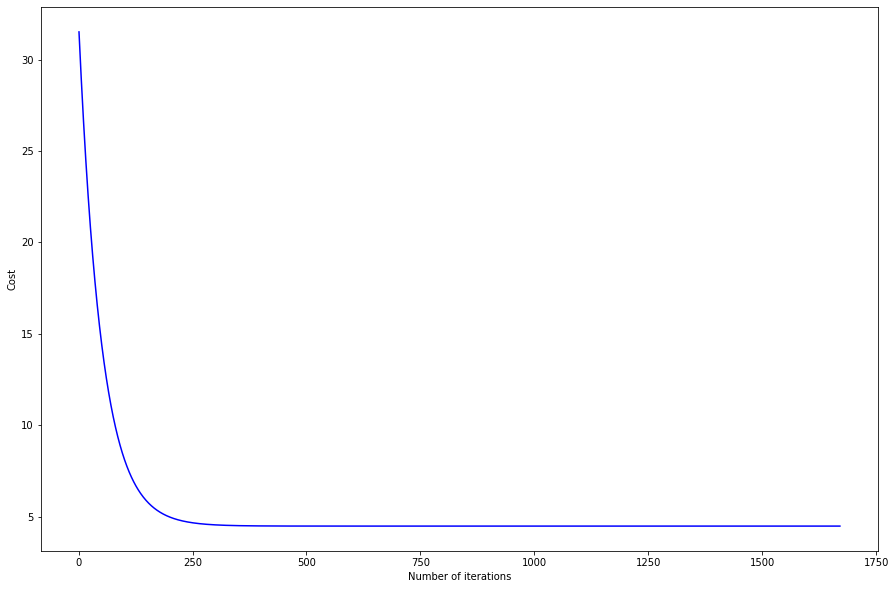

In [4]:
learning_rate = 0.01
iterations = 5000
theta = np.array([[0],[0]])

ar_linearRegression = linearRegression() #Initiated our class
X = ar_linearRegression.featureScaling(X) #We will scale our data
X_b = np.c_[np.ones((X.size, 1)), X] #We will concatanate 1 extra column of 1s with X 
theta, theta_history, cost_hostory = ar_linearRegression.gradientDescent(X_b, y, theta, learning_rate, iterations) #Used gdradient descent optimizer to get the value of theta to get the minimum value of cost.
print("The result of theta from Gradient Descent: {}".format(theta))
print("The final cost: {}".format(cost_hostory[-1]))
ar_linearRegression.simple_plot(cost_hostory,'Number of iterations','Cost')


Now we will try to find out the value of theta using Normal Function optimizer. 

In [5]:
df = pd.read_csv('dataset1.txt', names=['X', 'y'])
X = df[["X"]].to_numpy()
y = df[['y']].to_numpy()

X = ar_linearRegression.featureScaling(X)
X_b = np.c_[np.ones((X.size, 1)), X]
theta_normal = ar_linearRegression.Normalization(X_b, y)
cost_normal = ar_linearRegression.computeCost(X_b,y,theta_normal)

print("The value of theta from the Normal Function: {}".format(theta_normal))
print("The value of cost from the Normal Function: {}".format(cost_normal))

The value of theta from the Normal Function: [[5.83913505]
 [4.59304113]]
The value of cost from the Normal Function: 4.476971375975179


Let's see the which one is better between these two optimizers for our present dataset :)

In [6]:
if (cost_hostory[-1] > cost_normal):
    print("Normal Function optimizer is better!")
else:
    print("Gradient Descent optimizer is better!")

Normal Function optimizer is better!


#### ***Yeyy! So normal function wins for this dataset***

## ***A soft reminder***
#### Why do we need to know the value of the theta here? In mathematical overview, theta = slope. As we are building a linear regression model, we need a slope to make that straight line =, right? Slope will help us to determine how much inclination our model needs to fit with the dataset. If the cost is minimum then only we can predict accurate values for the unseen dataset.

Now we will predict a new value with a random data. Then plot the data along with our trained data to see how good it fits!

<function matplotlib.pyplot.show(close=None, block=None)>

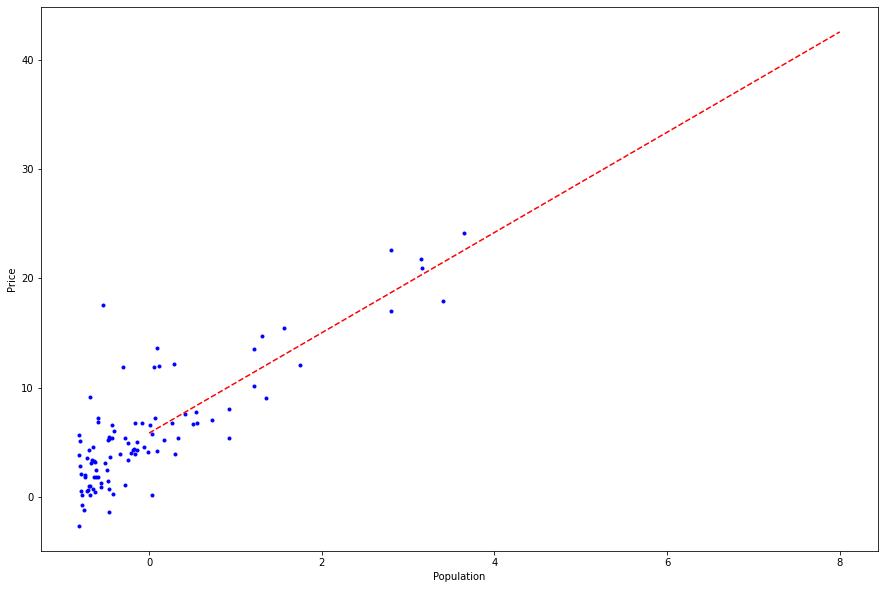

In [7]:
X_new = np.array([[0], [8]])
X_b = np.c_[np.ones((X_new.size, 1)), X_new]
y_predict = X_b.dot(theta_normal)
plt.plot(X,y, "b.")
plt.plot(X_new,y_predict, "r--")
plt.xlabel("Population")
plt.ylabel("Price")
plt.show